<a href="https://colab.research.google.com/github/hy0won/-/blob/master/Arsenal_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [ ]:
# Path of the file to read
arsenal_filepath = "../content/prem-arsenal.csv"

# Read the file into a variable spotify_data
arsenal_data = pd.read_csv(arsenal_filepath, index_col='date_col', parse_dates=True)

In [ ]:
arsenal_data.head()

,home,away,score,points,home-adv,referee
date_col,,,,,,
2018-08-12,arsenal,manchester city,0–2,0,1,Michael Oliver
2018-08-18,chelsea,arsenal,3–2,0,0,Martin Atkinson
2018-08-25,arsenal,west ham united,3–1,3,1,Graham Scott
2018-09-02,cardiff city,arsenal,2–3,3,0,Anthony Taylor
2018-09-15,newcastle united,arsenal,1–2,3,0,Lee Probert


승점 3점은 = win, 2점은 = draw, 1점은 = lose

In [ ]:
def get_result(point):
  if point==3:
    return 'Win'
  elif point==1:
    return 'Draw'
  else:
    return 'Lose'

arsenal_data['result']=arsenal_data['points'].map(get_result)
arsenal_data.head()

,home,away,score,points,home-adv,referee,result
date_col,,,,,,,
2018-08-12,arsenal,manchester city,0–2,0,1,Michael Oliver,Lose
2018-08-18,chelsea,arsenal,3–2,0,0,Martin Atkinson,Lose
2018-08-25,arsenal,west ham united,3–1,3,1,Graham Scott,Win
2018-09-02,cardiff city,arsenal,2–3,3,0,Anthony Taylor,Win
2018-09-15,newcastle united,arsenal,1–2,3,0,Lee Probert,Win


3년간 승무패 횟수 비교

Text(0.5, 1.0, 'The number of wins and losses in three years')

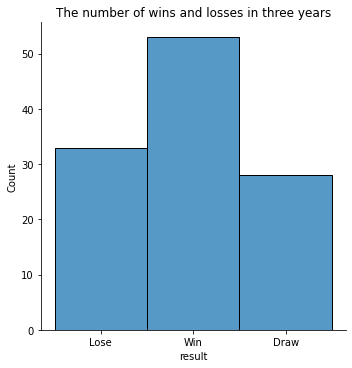

In [ ]:
sns.displot(arsenal_data['result'])
plt.title("The number of wins and losses in three years")

승무패 순으로 x축 항목 순서 변경

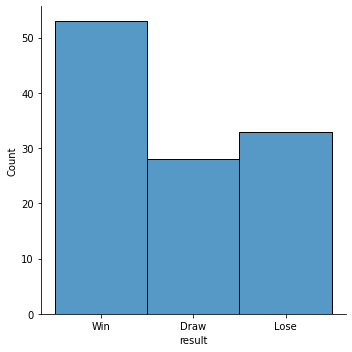

In [ ]:
arsenal_data['result']=pd.Categorical(arsenal_data['result'], ['Win','Draw','Lose'])
sns.displot(arsenal_data['result'])

심판 별 승무패 비교

<Figure size 1440x720 with 0 Axes>

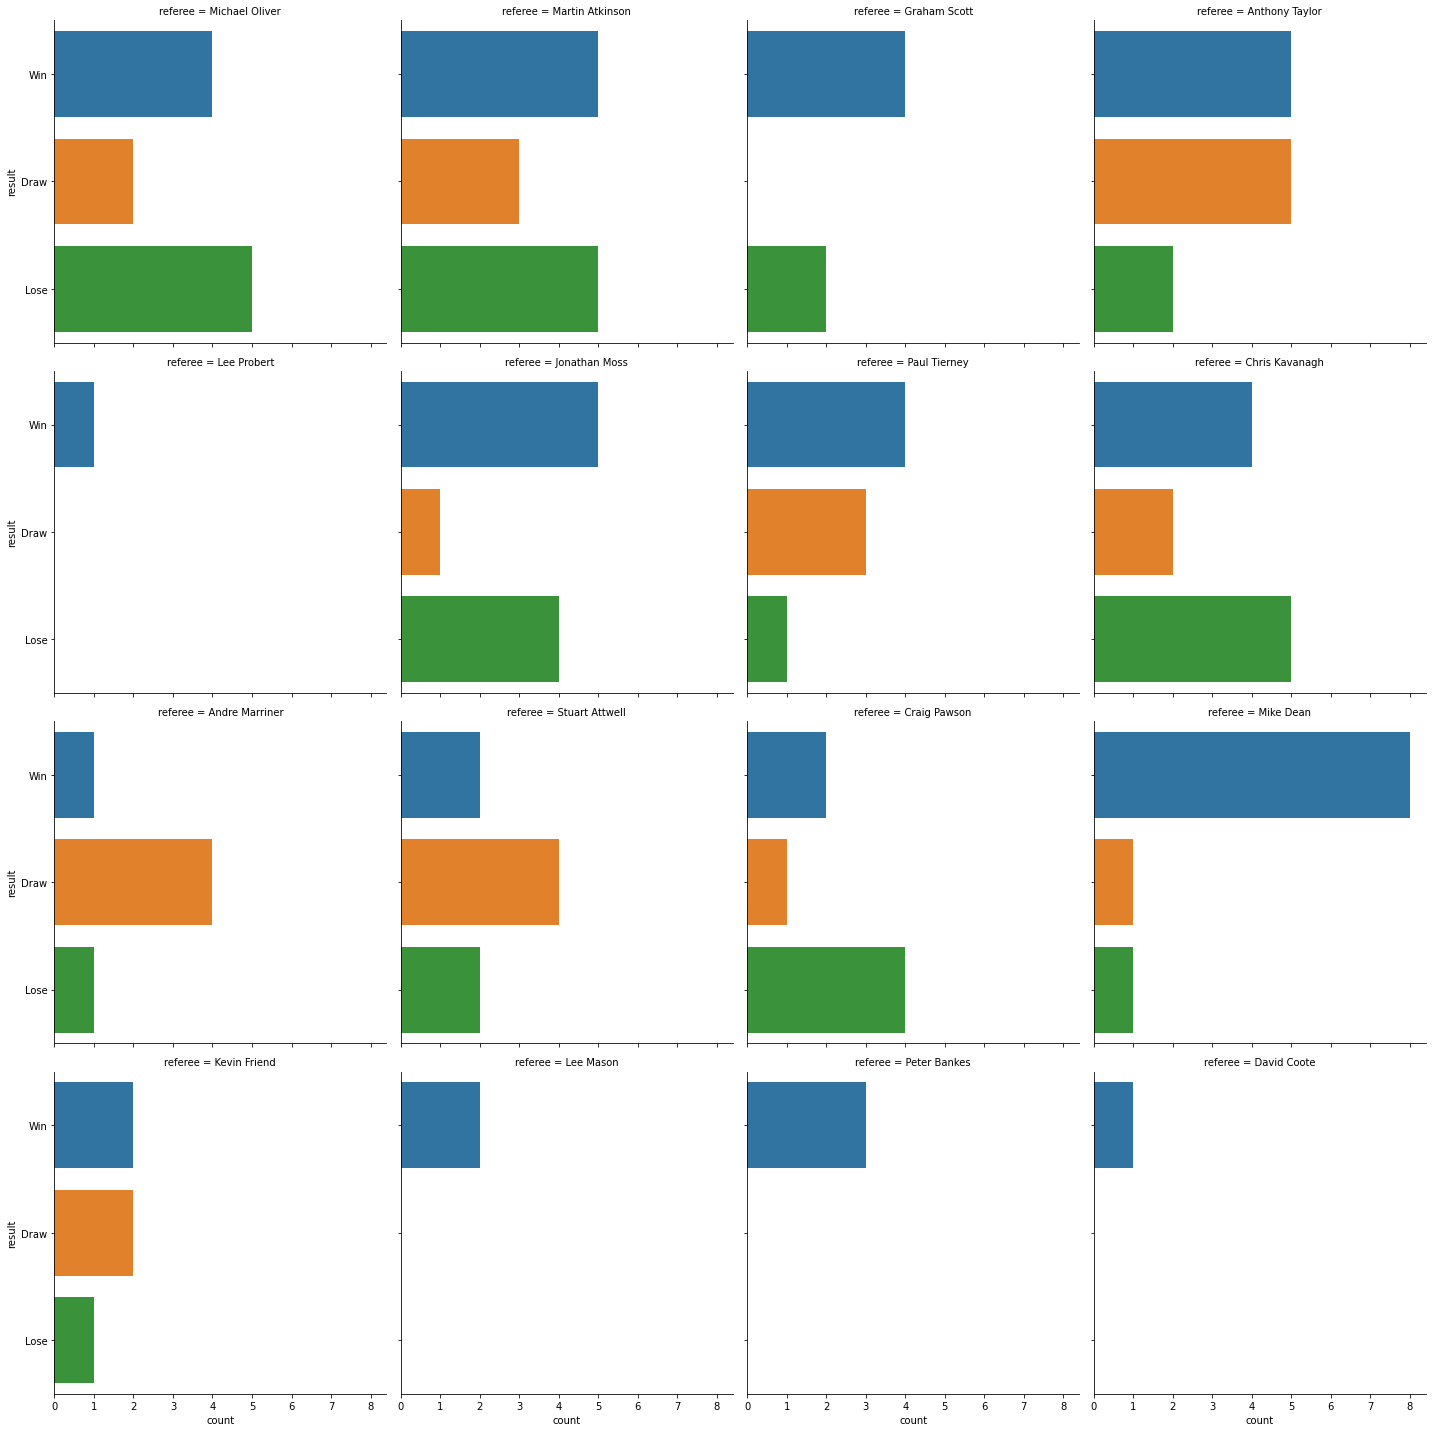

In [ ]:
plt.figure(figsize=(20,10))
sns.catplot(y='result', col='referee', data=arsenal_data, kind='count', col_wrap=4)

심판 별 승점 예측

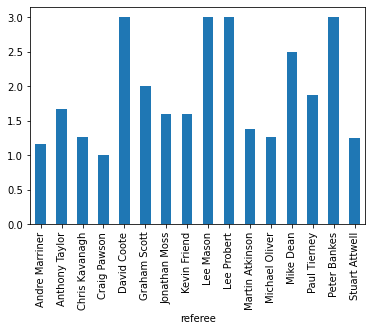

In [ ]:
arsenal_data.groupby('referee')['points'].mean().plot.bar()

아스날 홈경기만 추출

In [ ]:
# home 컬럼 선택
# 컬럼 값과 조건을 비교
# 그 결과를 새로운 변수에 할당한다
is_arsenal = arsenal_data['home'] == 'arsenal'
# 조건을 만족하는 데이터를 필터링하여 새로운 변수에 저장
home_arsenal = arsenal_data[is_arsenal]
# 결과 출력
home_arsenal

,home,away,score,points,home-adv,referee,result
date_col,,,,,,,
2018-08-12,arsenal,manchester city,0–2,0,1,Michael Oliver,Lose
2018-08-25,arsenal,west ham united,3–1,3,1,Graham Scott,Win
2018-09-23,arsenal,everton,2–0,3,1,Jonathan Moss,Win
2018-09-29,arsenal,watford,2–0,3,1,Anthony Taylor,Win
2018-10-22,arsenal,leicester city,3–1,3,1,Chris Kavanagh,Win
2018-11-03,arsenal,liverpool,1–1,1,1,Andre Marriner,Draw
2018-11-11,arsenal,wolverhampton wanderers,1–1,1,1,Stuart Attwell,Draw
2018-12-02,arsenal,tottenham hotspur,4–2,3,1,Mike Dean,Win
2018-12-08,arsenal,huddersfield town,1–0,3,1,Paul Tierney,Win


아스날 홈경기 승리 

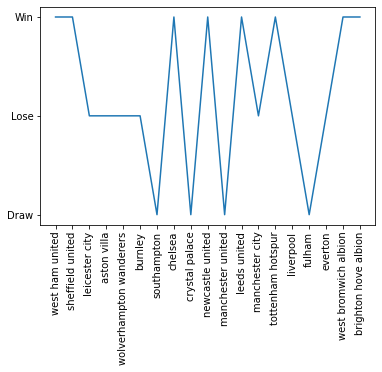

In [ ]:
plt.plot(home_arsenal['away'][38:], home_arsenal['result'][38:])
plt.xticks(rotation=90)
#y축 상하반전
plt.gca().invert_yaxis()

# 20-21 홈 경기 결과 비율 파이차트로 그리기

([<matplotlib.patches.Wedge at 0x7f1e0f31a610>,
 [Text(0.2700340253456176, 1.06634029519457, 'Win'),
  Text(-0.8680545570066952, -0.6756339882361679, 'Lose'),
  Text(0.868054557006695, -0.6756339882361682, 'Draw')],
 [Text(0.14729128655215504, 0.5816401610152199, '42.1%'),
  Text(-0.4734843038218337, -0.36852762994700067, '36.8%'),
  Text(0.4734843038218336, -0.3685276299470008, '21.1%')])

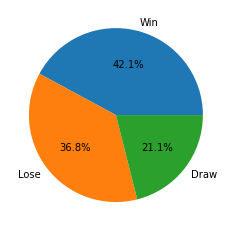

In [ ]:
# groupby를 사용하면 갯수를 셀때는 value_counts()를 이용한다
# value_count의 인덱스를 사용할려면 index.tolist()를 사용한다

plt.pie(home_arsenal['points'][38:].value_counts(), 
        labels=home_arsenal['result'][38:].value_counts().index.tolist(),
        autopct = '%.1f%%')